# Plot the shape file

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xesmf as xe
import xclim.sdba as sdba

In [2]:
# open shapefile
# Import 
map = gpd.read_file('../Data/Gezira_shapefile/Gezira.shp', crs="epsg:4326")

# View GeoDataFrame
map.head()

,Id,Name,Status,Area,Intake,geometry
0,0,Gezira and Managil,Existing scheme,11591.622853,Sennar dam,"POLYGON ((465397.856 1690747.201, 466289.073 1..."


<Axes: >

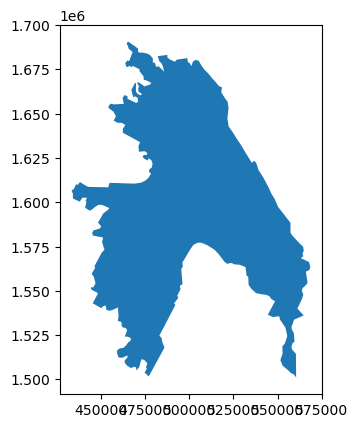

In [3]:
map.plot()

In [12]:
# open ERA5 data sample
ds_e5_pr_sample = xr.open_dataset("../Data/era5_Geriza/precip/e5.precip.daily.1990.nc")

In [13]:
# Check the data unit
ds_e5_pr_sample.tp.attrs

{'units': 'm', 'long_name': 'Total precipitation'}

In [14]:
pr_e5_sample = ds_e5_pr_sample.tp * 1000 # do the unit conversion
pr_e5_sample.attrs['units'] = 'mm/day' # update the unit attributes

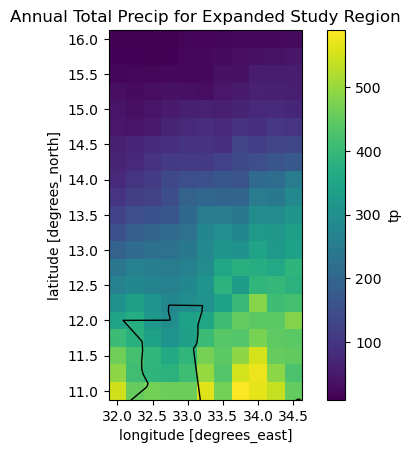

In [15]:
# plot a the annual total, to visualize the data
pr_annual_total = pr_e5_sample.sum('time')
fig, ax = plt.subplots(subplot_kw = dict(projection=ccrs.PlateCarree(),transform=ccrs.PlateCarree()))
pr_annual_total.plot.pcolormesh(ax = ax)
ax.coastlines()
ax.set_xticks(pr_annual_total.longitude[::2])
ax.set_yticks(pr_annual_total.latitude[::2])
ax.add_feature(cfeature.BORDERS)
ax.set_title("Annual Total Precip for Expanded Study Region")
plt.show()

In [18]:
# open ERA5 data sample
pre_mon_1980 = xr.open_dataset("../Data/TerraClimate_Gridded_Obs_Geriza/precip/TerraClimate.precip.monthly.1980.nc")
pre_mon_1980

<xarray.Dataset> Size: 693kB
Dimensions:  (crs: 1, lon: 60, lat: 120, time: 12)
Coordinates:
  * crs      (crs) int16 2B 3
  * lon      (lon) float64 480B 32.02 32.06 32.1 32.15 ... 34.4 34.44 34.48
  * lat      (lat) float64 960B 15.98 15.94 15.9 15.85 ... 11.1 11.06 11.02
  * time     (time) datetime64[ns] 96B 1980-01-01 1980-02-01 ... 1980-12-01
Data variables:
    ppt      (time, lat, lon) float64 691kB ...
Attributes: (12/49)
    method:                          These layers from TerraClimate were crea...
    title:                           TerraClimate: monthly climate and climat...
    summary:                         This archive contains a dataset of high-...
    keywords:                        WORLDCLIM,global,monthly, temperature,pr...
    id:                              Blank
    naming_authority:                edu.uidaho.nkn
    ...                              ...
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    Up
    references:                      Abatzoglou, J.T., S.Z. Dobrowski, S.A. P...
    source:                          WorldClim v2.0 (2.5m), CRU Ts4.0, JRA-55
    version:                         v1.0
    Conventions:                     CF-1.6

In [20]:
# Check the data unit
pre_mon_1980.tp.attrs

AttributeError: 'Dataset' object has no attribute 'tp'